# Chapter 4 Figure 0

In [1]:
import sys
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
record = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/session_record.csv',index_col=0)

16
K10
K11
K13
K4
K9
Q45
myrtle
q40
volde


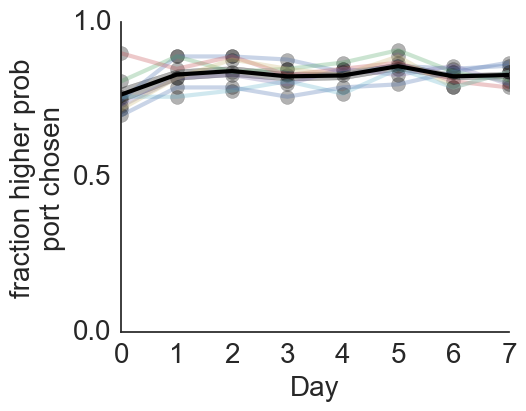

In [33]:
mice = ['K7','K13','Q43','Q45','dumble','harry']
mice = np.unique(record['Mouse ID'].values)
#mice = np.delete(mice,np.where(mice=='dumble'))
#mice = np.delete(mice,np.where(mice=='harry'))
#mice = np.delete(mice,np.where(mice=='K4'))
#mice = np.delete(mice,np.where(mice=='K10'))
#mice = np.delete(mice,np.where(mice=='K11'))
mice = np.delete(mice,np.where(mice=='q45'))
mice = np.delete(mice,np.where(mice=='q43'))
#mice = np.delete(mice,np.where(mice=='quirrel'))
mice = np.delete(mice,np.where(mice=='sprout'))
mice = np.delete(mice,np.where(mice=='tom'))
#mice = np.delete(mice,np.where(mice=='tonks'))
#mice = np.delete(mice,np.where(mice=='volde'))
#mice = np.delete(mice,np.where(mice=='K9'))
#mice = np.delete(mice,np.where(mice=='K7'))
#mice = np.delete(mice,np.where(mice=='myrtle'))

print(mice.shape[0])
sns.set_style('white')
plt.figure(figsize=(5,4))
y = np.zeros((mice.shape[0]-9,10))
x = np.arange(0,10)
k = 0 
for i,mouse in enumerate(mice):
    y_temp = record[((record['Mouse ID'] == mouse) & ((record['Left Reward Prob'] == 0.8) | (record['Left Reward Prob'] == 0.2)))]['p(high Port)'].values
    try:
        y[k,:] = y_temp[-10:]
        plt.plot(x,y[k,:],label=mouse,alpha=0.3,linewidth=3)
        plt.scatter(x,y[k,:],label=mouse,alpha=0.3,s=100,color='black')
        k+=1
    except:
        print(mouse)

plt.plot(x,y.mean(axis=0),color='black',linewidth=3)
err = y.std(axis=0)/np.sqrt(7)
plt.fill_between(x,y1=y.mean(axis=0)+err,y2=y.mean(axis=0)-err,color='black',alpha=0.3)
plt.ylim(0,1)
plt.xlim(0,7)
plt.xticks(fontsize=20)
plt.yticks([0,0.5,1],fontsize=20)
plt.xlabel('Day',fontsize=20)
plt.ylabel('fraction higher prob\nport chosen',fontsize=20)
#plt.legend(loc='best')
sns.despine(top='True')

In [5]:
columns = ['Elapsed Time (s)','Since last trial (s)','Trial Duration (s)','Port Poked','Right Reward Prob','Left Reward Prob','Reward']
data = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/trial_data/07132016_harry_trials.csv',names=columns)

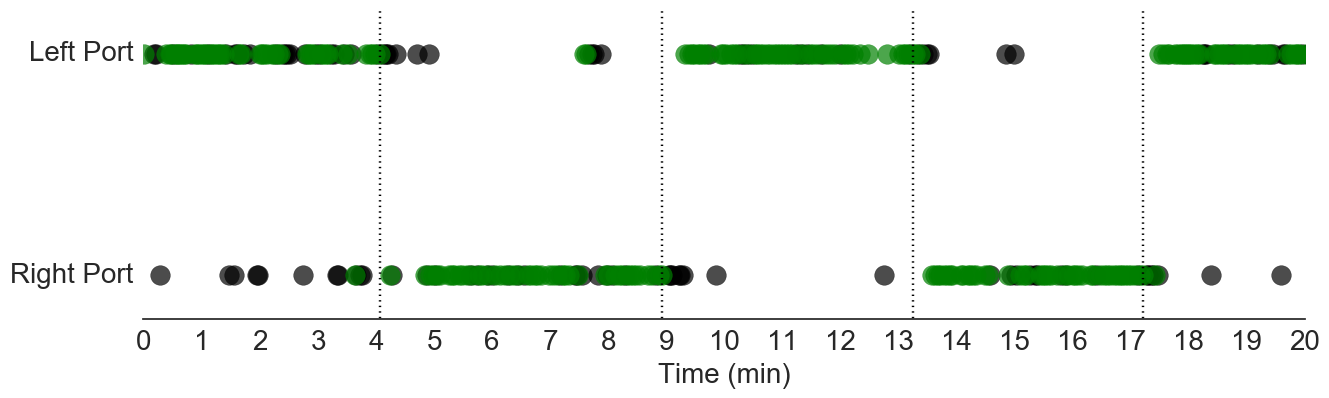

In [35]:
block_start_trials = np.where(np.abs(np.diff(data['Right Reward Prob'].values))!=0)
block_start_times = data['Elapsed Time (s)'].values[block_start_trials[0]]

num_trials = 1600
sns.set_style('white')
plt.figure(figsize=(15,4))
plt.vlines(block_start_times,ymin=0,ymax=3,linestyle='dotted')
plt.scatter(data[data['Reward'] == 0]['Elapsed Time (s)'].values[:num_trials],
            data[data['Reward'] == 0]['Port Poked'].values[:num_trials],color='black',s=200,alpha=0.7)
plt.scatter(data[data['Reward'] == 1]['Elapsed Time (s)'].values[:num_trials],
            data[data['Reward'] == 1]['Port Poked'].values[:num_trials],color='green',s=200,alpha=0.7)
plt.xticks(np.arange(0,1700,60),list(map(int,np.arange(0,1700/60))),fontsize=20)
plt.yticks([1,2],['Right Port','Left Port'],fontsize=20)
plt.xlim(-1,1201)
plt.xlabel('Time (min)',fontsize=20)
plt.ylim(0.8,2.2)
sns.despine(left=True)
fig_name = '/Users/shayneufeld/Dropbox/Thesis/CHPT4/Figures/singlesession.eps'
plt.savefig(fig_name, format='eps', dpi=1000)

In [16]:
data90 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/full_9010_02192017.csv',index_col=0)
data80 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/full_8020_02192017.csv',index_col=0)
data70 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/full_7030_02192017.csv',index_col=0)
data90['Condition'] = '90-10'
data80['Condition'] = '80-20'
data70['Condition'] = '70-30'
datas = data90.append(data80)
datas = datas.append(data70)

In [18]:
datas.head(1)

,Mouse ID,Session ID,Block Trial,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,10_trialDuration,9_Port,...,1_Port,1_Reward,1_ITI,1_trialDuration,0_ITI,Decision,Switch,Higher p port,Reward,Condition
0,K1,11042016_K1,11.0,9.0,-1.0,0.0,0.0,15.781,1.542,1.0,...,1.0,0.0,1.346,0.674,1.087,1.0,0.0,1.0,1.0,90-10


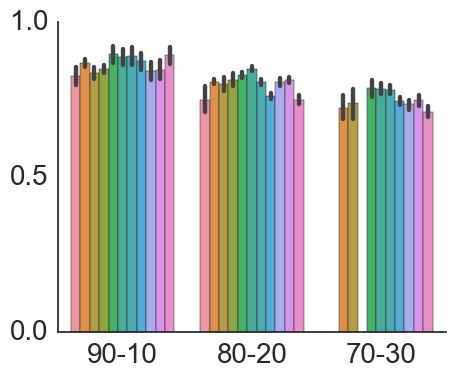

In [32]:
#ax2 = sns.barplot(x='Condition',y='Higher p port',data=datas)
plt.figure(figsize=(5,4))
ax1 = sns.barplot(x='Condition',y='Higher p port',data=datas,hue='Mouse ID')
plt.yticks([0,0.5,1.0],fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('')
plt.xlabel('')
ax1.legend_.remove()
sns.despine()
